In [1]:
import torch
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time

# **Importing the Files**

In [2]:
training_set = pd.read_csv(r"C:\\Users\\Sadman\\OneDrive - City University of Hong Kong - Student\\McGill Studies Semester B 2023\\ECSE 552\\HW1\\data"+"\\"+"training_set.csv",header=None)
training_labels_bin = pd.read_csv(r"C:\\Users\\Sadman\\OneDrive - City University of Hong Kong - Student\\McGill Studies Semester B 2023\\ECSE 552\\HW1\\data"+"\\"+"training_labels_bin.csv",header=None)
validation_set = pd.read_csv(r"C:\\Users\\Sadman\\OneDrive - City University of Hong Kong - Student\\McGill Studies Semester B 2023\\ECSE 552\\HW1\\data"+"\\"+"validation_set.csv",header=None)
validation_labels_bin = pd.read_csv(r"C:\\Users\\Sadman\\OneDrive - City University of Hong Kong - Student\\McGill Studies Semester B 2023\\ECSE 552\\HW1\\data"+"\\"+"validation_labels_bin.csv",header=None)


# **Splitting into Training and Testing sets**

In [3]:
x_train = training_set
y_train = training_labels_bin

In [4]:
x_train = x_train.T
y_train = y_train.T

In [5]:
x_val = (validation_set).T
y_val = pd.DataFrame((validation_labels_bin).T)

# **Defining Sigmoid and Derivative of Sigmoid Function**

In [6]:
def sigmoid(x): #sigmoid function
    z = 1/(1 + np.exp(-x))
    return z
def sigmoid_derivative(x): #derivative of sigmoid function
    z = (np.exp(-x)/np.square(1 + np.exp(-x)))
    return z

# **Function for Creating Layers and Initializing Weights and Biases**
The function creates and initializes all the weight matrices and bias vectors. It takes the inputs no_hidden_layers(an INTEGER of the desired number of hidden layers), no_neurons(A LIST of Integers showing the number of neurons in each layer), and num_feats (number of features of each sample in our dataset). The length of the List no_neorons has to be equal to the INTEGER no_hidden_layers.

In [7]:
def create_layers(no_hidden_layers,no_neurons,num_feats): 
                                                  
    if no_hidden_layers != len(no_neurons):
        raise ValueError("Number of hidden layers and length of \"no_neurons\" list must have the same size")
    W=[i for i in range(no_hidden_layers+1)]
    b=[i for i in range(no_hidden_layers+1)]
    
    for i in range(no_hidden_layers+1):
        
        if i == 0:
            W[i] = np.random.rand(no_neurons[i],num_feats)*0.1
            b[i] = np.random.rand(no_neurons[i],1)*0.1
        elif i == no_hidden_layers :
            W[i] = np.random.rand(3,no_neurons[i-1])*0.1
            b[i] = np.random.rand(3,1)*0.1
        else:
            W[i] = np.random.rand(no_neurons[i],no_neurons[i-1])*0.1
            b[i] = np.random.rand(no_neurons[i],1)*0.1
    return W,b

# **Function for Forward Propagation**
It takes in x (input vector of each sample), W (list of Weight Matrices generated by create_layers() function), and b (list of bias vectors generated by create_layers() function).

For the first layer h[0] is x (input vector of each sample). It undergoes the linear transformation: a[0] = b[0]++W[0]*h[0]. The linear transformation a[0] is passed into Sigmoid Function and we get h[1] = Sig(a[0]). 

This is repeated for all the layers. a and h outputs are returned by the function which are lists that stores all the vectors. 

In [8]:
def forward_feed(x,W,b): # Function of forward pass that takes in one sample (x: a vector with number of  rows equal to numver of features), W(LIST of Weight Matrices of each layer) and b(LIST bias vectors for each layer)
    
    no_hidden_layers = len(W)-1
    a=[i for i in range(no_hidden_layers+1)]
    h=[i for i in range(no_hidden_layers+2)]
    h[0]=x
    for i in range(no_hidden_layers+1):
        
        a[i] = b[i] + np.matmul(W[i],h[i])
        h[i+1] = sigmoid(a[i])
    
    
    return a,h # Returns a (W*h+b; it is a LIST of output vectors before applying activation function for each layer) and h(sigmoid(a); it is a LIST of output vectors after applying activation function for each layer)
    

# **Function for Back Propagation**

This function generates the backpropagation gradients with respect to all the weight matrices and bias vectors. 
It takes the inputs W (list of Weight Matrices generated by create_layers() function), b (list of bias vectors generated by create_layers() function), a and h (vectors of outputs of each layer generated by forward_feed() function), and y (the actual given outputs).

It outputs two lists: dl_db (list of vectors when differentiated with respect to bias vectors in each layer), and dl_dw (list of matrices when differentiated with respect to weight matrices in each layer).

In [9]:
def back_prop(W,b,a,h,y):
    g = 2*(h[3]-y.reshape(y.shape[0],1)) # Differentiation of loss function with respect to predicted y (h[3])
    dl_db = [None] * len(b) 
    dl_dw = [None] * len(W)
    for k in range(2,-1,-1):
        g = g*sigmoid_derivative(a[k])
        dl_db[k] = g
        dl_dw[k] = np.matmul(g,h[k].T)
        g = np.matmul( W[k].T , g )

        
    return dl_db, dl_dw
        

# **Setting all the Hyperparameters for Training the Model**

In [10]:
# hyperparameters (you may change these)
eta = 0.1 # intial learning rate
gamma = 0.1 # multiplier for the learning rate
stepsize = 200 # epochs before changing learning rate
threshold = 0.08 # stopping criterion
test_interval = 2 # number of epoch before validating
max_epoch = 2000
N = x_train.shape[1]
num_feats = x_train.shape[0]
n_out = y_train.shape[0]

# **Initializing Weight Matrices and Bias Vectors of our Neural Network**

We are using 2 hidden layers along wuth the input layer and the output layer. That results in a total of 4 layers in the network. The input vectors  are 354 x 1 as there are 354 features. We assign the number of neurons to be 150 for the first layer and 75 for the second layer. The output layer has 3 neurons as our output dataset as 3 labels. 

In [11]:
W,b = create_layers(2,[10,10],num_feats)

# **Training the Neural Network**

We create two FOR loops: the first one iterates for number of epochs and the second one iterates over each sample.

The network is fed one sample at a time and it is randomly taken from the dataset. Stochastic Gradient Descent is also applied. For each sample being fed through the network, we perform gradient descent on the weights and biases using the calculated gradients to update and find optimal values of the parameters. 

In [12]:
train_mses = [None] * (max_epoch)
val_mses = [None] * (max_epoch)

for epoch in range(0, max_epoch):
    
    order = np.random.permutation(N) # shuffle data
    
    sse = 0
    for n in range(0, N,):
        idx = order[n]
        #print(n)
        # get a sample (batch size=1)
        x_in = np.array(x_train.T.iloc[idx,:]).reshape((num_feats, 1))
        y = np.array(y_train.T.iloc[idx,:]).reshape((n_out, 1))

        # the forward pass here
        a,h = forward_feed(x_in,W,b)
        
        
    
        # computing error and gradients here
        loss = np.square(h[3] - y).sum()
        dl_db, dl_dw = back_prop(W,b,a,h,y)
        
        # updating weights and biases here
        for i in range(3):
            
            W[i] = W[i] - eta * dl_dw[i]
            b[i] = b[i] - eta * dl_db[i]
            
        sse += loss

    train_mse = sse/(x_train).shape[1] # Training MSE after each epoch
    train_mses[epoch] = train_mse
    
    if epoch % test_interval == 0: 
        # testing on validation set here
        val_sse = 0
        
        for i in range(x_val.shape[1]):
            x_in_val = np.array(x_val.T.iloc[i,:]).reshape((num_feats, 1))
            yi_val = np.array(y_val.T.iloc[i,:]).reshape((n_out, 1))
            a_val,h_val = forward_feed(x_in_val,W,b)
            
            val_sse += np.square(h_val[3] - yi_val).sum()
        val_mse = val_sse/x_val.shape[1]
        print(val_mse)
        val_mses[epoch] = val_mse
        # if termination condition is satisfied, break and exit the loop
        if val_mse < threshold:
            break
    # The learning rate is decreases after each 200th epoch so that towards the end we arrive at the optimal values of W and b slower and more accurately.
    if epoch % stepsize == 0 and epoch != 0:
        eta = eta*gamma
        print('Changed learning rate to lr=' + str(eta))

0.7001644139992926
0.49255582052003954
0.5191490089271377
0.5064704227727944
0.32836709932107877
0.23405537629856601
0.21344109760737254
0.1522786183822971
0.1679498334188137
0.17653874262273425
0.1440499772347252
0.17773379198280922
0.1297398191875359
0.09710232008564083
0.09677164617573776
0.09075415864922723
0.1008488859097856
0.08847781140169562
0.07790596077968355


In [13]:
for i in val_mses:
    if i==None:
        val_mses.remove(None)

# **Plotting the Error Curves with respect to Number of Epochs**

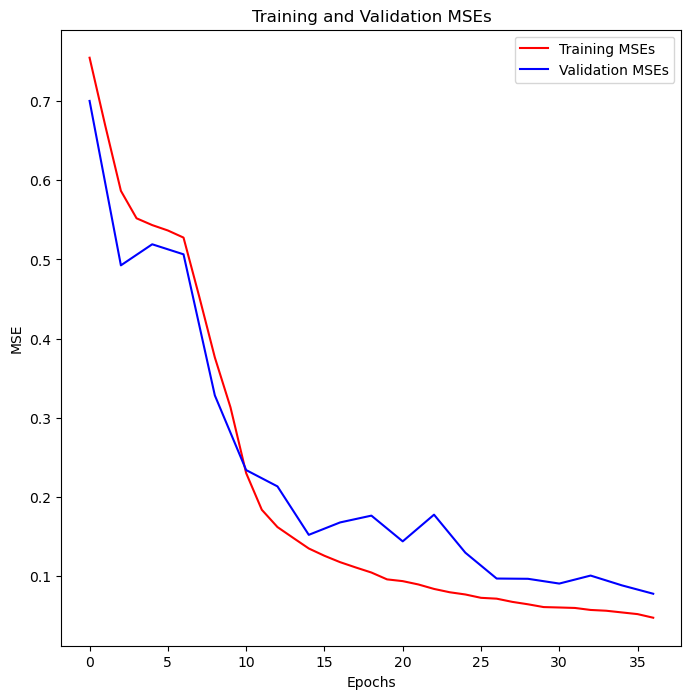

In [14]:
plt.figure(figsize=(8,8))
plt.plot([i for i in range(0, max_epoch)], train_mses, 'r-', label = "Training MSEs")
plt.plot([i for i in range(0, max_epoch,2)], val_mses, 'b-', label = "Validation MSEs")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSEs')
plt.legend()
plt.show()